# Introduction to Statistical Tests - Test Your Knowledge Key

In [1]:
library(tidyverse) 
library(ggpubr) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Loading and viewing data
full.data <- read.csv("Module3_4/Module3_4_FullDemoChemData.csv")

head(full.data)

,ID,BMI,BMIcat,MAge,MEdu,BW,GA,Smoker,Smoker3,DWAs,DWCd,DWCr,UAs,UCd,UCr
,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,27.7,Overweight,22.99928,College_Degree,3180.058,34,NS,Never,6.426464,1.292941,51.67987,10.192695,0.7537104,42.60187
2,2,26.8,Overweight,30.05142,College_Degree,3210.823,43,S,Never,7.832384,1.798535,50.10409,11.815088,0.9789506,41.30757
3,3,33.2,Overweight,28.04660,College_Degree,3311.551,40,NS,Never,7.516569,1.288461,48.74001,10.079057,0.1903262,36.47716
4,4,30.1,Overweight,34.81796,College_Degree,3266.844,32,S,Never,5.906656,2.075259,50.92745,8.719123,0.9364825,42.47987
5,5,37.4,Overweight,42.68440,College_Degree,3664.088,35,NS,Never,7.181873,2.762643,55.16882,9.436559,1.4977829,47.78528
6,6,33.3,Overweight,24.94960,College_Degree,3328.988,40,NS,Never,9.723429,3.054057,51.14812,11.589403,1.6645837,38.26386


Let's first assess normality of birth weight (`BW`) using a histogram, a Q-Q plot, and the Shapiro-Wilk test.

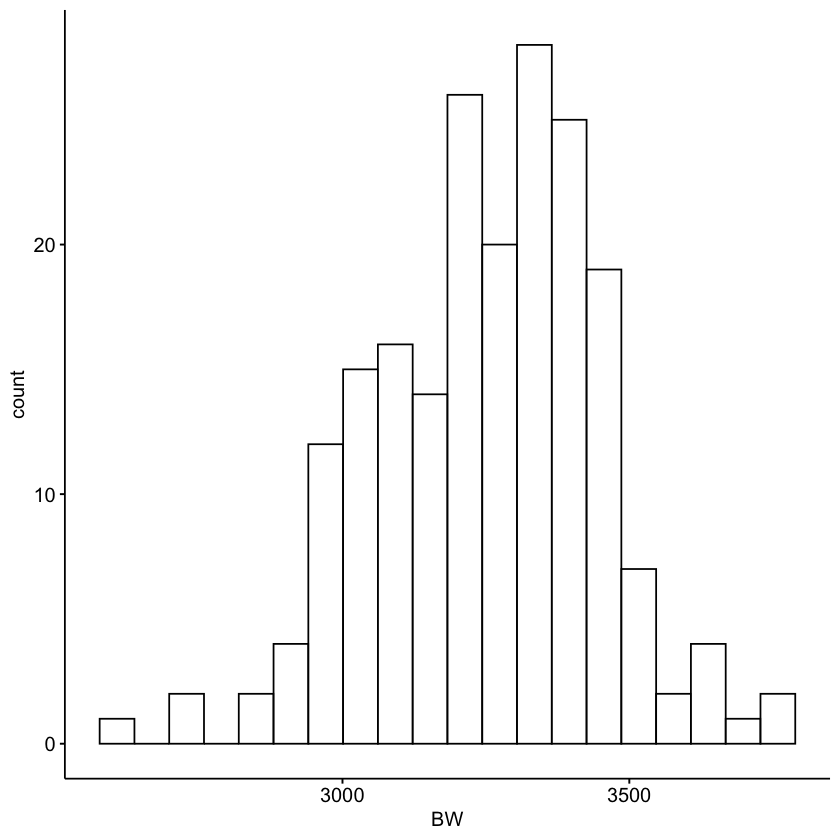

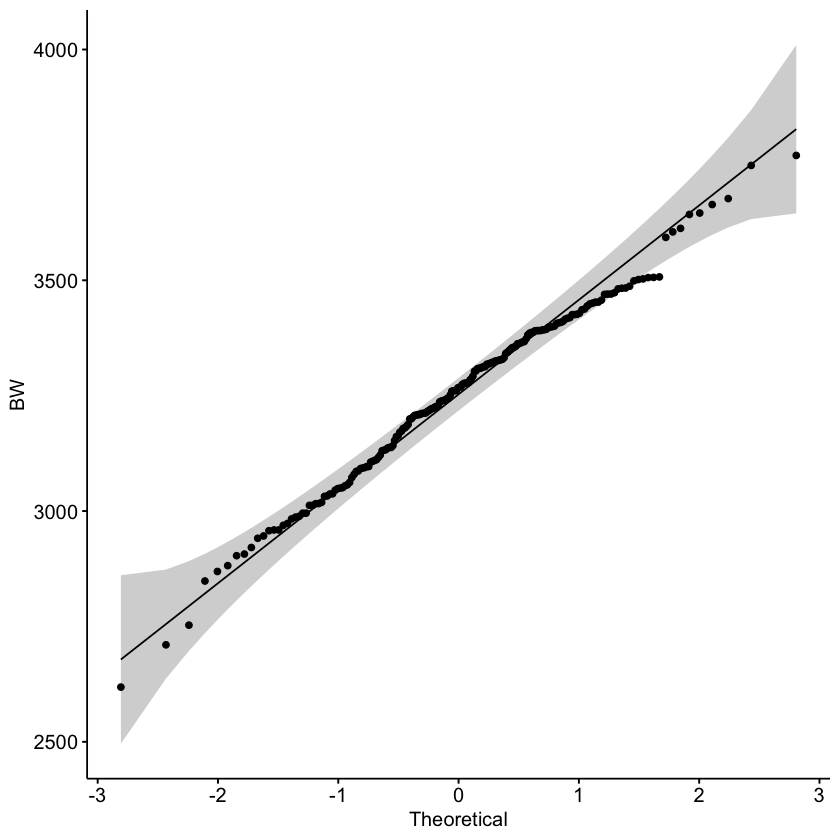

In [3]:
gghistogram(data = full.data, x = "BW", bins = 20)
ggqqplot(full.data$BW, ylab = "BW")

In [4]:
shapiro.test(full.data$BW)


	Shapiro-Wilk normality test

data:  full.data$BW
W = 0.99067, p-value = 0.2232


From the plots and the Shapiro-Wilk test, birth weight is considered to be normally distributed. Since we're interested in determining if there's statistical significance between a continuous variable (birth weight) and a categorical variable (maternal education), we'll use an ANOVA test.

<br>
Let's start with visualizing the distribution of birth weight across the maternal education categories.

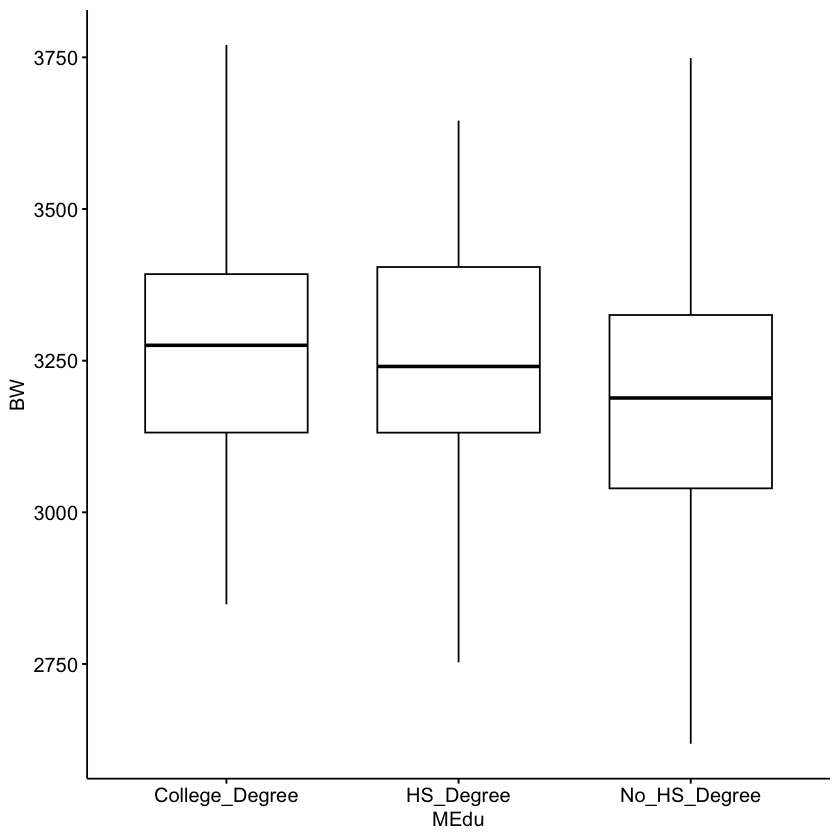

In [5]:
ggboxplot(data = full.data, x = "MEdu", y = "BW")

There doesn't seem to much a difference, but we'll go ahead and run the ANOVA test.

In [6]:
anova(aov(data = full.data, BW ~ MEdu))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
MEdu,2,149777.2,74888.61,2.018748,0.1355602
Residuals,197,7308021.9,37096.56,NA,NA


Given that the p value ~0.14, there are no significant differences in birth weight based on a mother's education level.